In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("house_prices.csv")
df.head()


,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Location       300 non-null    object
 6   Property_Type  300 non-null    object
 7   Price          300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


,Area,Bedrooms,Bathrooms,Age,Price
count,300.00000,300.000000,300.000000,300.000000,3.000000e+02
mean,2759.70000,3.033333,2.026667,25.000000,2.488366e+07
std,1297.68143,1.467219,0.792495,14.332646,1.266525e+07
min,520.00000,1.000000,1.000000,0.000000,3.695000e+06
25%,1675.75000,2.000000,1.000000,12.000000,1.527750e+07
50%,2738.00000,3.000000,2.000000,25.500000,2.236500e+07
75%,3801.25000,4.000000,3.000000,36.250000,3.460812e+07
max,4999.00000,5.000000,3.000000,49.000000,5.870000e+07


In [5]:
df.isnull().sum()


Property_ID      0
Area             0
Bedrooms         0
Bathrooms        0
Age              0
Location         0
Property_Type    0
Price            0
dtype: int64

In [6]:
# Fill numerical missing values with median
for col in df.select_dtypes(include=np.number):
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include="object"):
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_17160\3651686333.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_17160\3651686333.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [7]:
# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)
df.head()


,Area,Bedrooms,Bathrooms,Age,Price,Property_ID_PROP0002,Property_ID_PROP0003,Property_ID_PROP0004,Property_ID_PROP0005,Property_ID_PROP0006,...,Property_ID_PROP0295,Property_ID_PROP0296,Property_ID_PROP0297,Property_ID_PROP0298,Property_ID_PROP0299,Property_ID_PROP0300,Location_Rural,Location_Suburb,Property_Type_House,Property_Type_Villa
0,3712,4,3,36,22260000,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,1591,4,1,35,16057500,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,1646,4,3,20,12730000,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,4814,1,2,13,50840000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,800,4,2,38,10650000,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
X = df.drop("Price", axis=1)   # Features
y = df["Price"]               # Target variable


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 240
Testing samples: 60


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
y_pred = model.predict(X_test)


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MODEL EVALUATION RESULTS")
print("------------------------")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MODEL EVALUATION RESULTS
------------------------
MAE: 2356914.29
MSE: 9321646434831.59
R² Score: 0.93


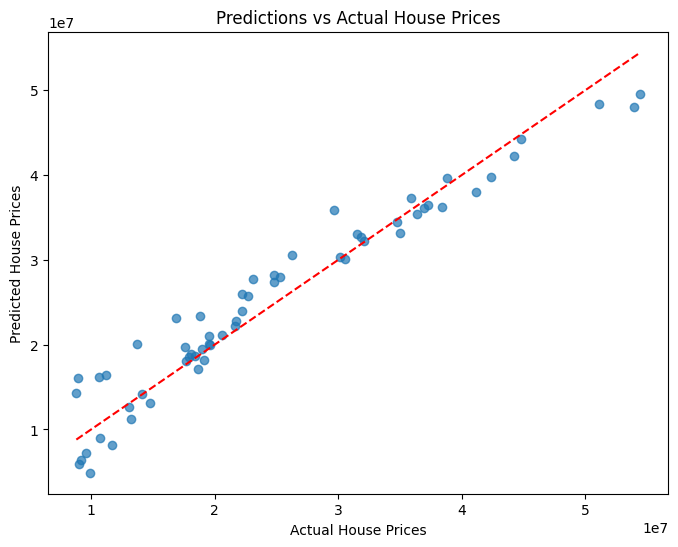

In [16]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--"
)

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predictions vs Actual House Prices")

# SAVE the figure
plt.savefig("predictions_vs_actual.png", dpi=300, bbox_inches="tight")

# Display the figure
plt.show()



In [14]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
231,Property_ID_PROP0229,8.163115e+06
212,Property_ID_PROP0210,7.641262e+06
272,Property_ID_PROP0270,7.141217e+06
215,Property_ID_PROP0213,6.790019e+06
166,Property_ID_PROP0164,6.563920e+06
...,...,...
295,Property_ID_PROP0293,-5.880622e+06
211,Property_ID_PROP0209,-6.220978e+06
227,Property_ID_PROP0225,-6.592256e+06
304,Location_Suburb,-8.254662e+06


In [15]:
"""
INSIGHTS:
- Area has the strongest influence on house prices
- Location significantly impacts pricing
- Bedrooms contribute moderately
- Linear Regression explains a large portion of price variance
"""
"""
CONCLUSION:
A supervised machine learning regression model was successfully built
to predict house prices. The model was evaluated using MAE, MSE, and R²
and demonstrated good predictive performance. This project showcases
the complete machine learning workflow.
"""


'\nCONCLUSION:\nA supervised machine learning regression model was successfully built\nto predict house prices. The model was evaluated using MAE, MSE, and R²\nand demonstrated good predictive performance. This project showcases\nthe complete machine learning workflow.\n'